## 5 网络中的度度相关（匹配性）

衡量度度相关性的方法有:
    - degree correlation matrix (Maslov and Sneppen, Science 2001)
    - degree correlation function (Pastor Satorras and Vespignani, PRL 2001)
    - degree correlation coefficient (Newman, PRL 2002)
参考文献:
1. Maslov S, Sneppen K. Specificity and stability in topology of protein networks[J]. Science, 2002, 296(5569): 910-913.
2. Pastor-Satorras R, Vázquez A, Vespignani A. Dynamical and correlation properties of the Internet[J]. Physical review letters, 2001, 87(25): 258701.
2. Vázquez A, Pastor-Satorras R, Vespignani A. Large-scale topological and dynamical properties of the Internet[J]. Physical Review E, 2002, 65(6): 066130.
3. Newman M E J. Assortative mixing in networks[J]. Physical review letters, 2002, 89(20): 208701

作业:
1. 请选择一个实际网络，用三种方式来看网络的匹配性
2. 对上一张生成的BA网络，看网络的匹配性
3. 阅读Newman相关文献，并思考：Newman所提指标与计算度的pearson相关系数间的关系

#### 度相关性矩阵 (degree correlation matrix)
$$E(k_0,k_1) = P(k_0,k_1)$$
$$C(k_0,k_1) = \frac{P(k_0,k_1)}{P_r(k_0,k_1)}$$


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


In [5]:
# 科学家合作网
g_coll = nx.read_edgelist('./data/N1461_Coauthorships', create_using=nx.Graph())

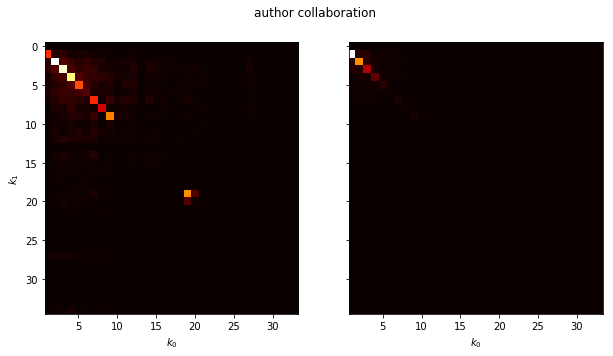

In [37]:
## Degree Correlation Matrix
def cal_correlation_matrix(g):
    degs = dict(g.degree())
    max_k = max(list(degs.values()))
    emat = np.zeros((max_k+1, max_k+1))
    cmat = np.zeros((max_k+1, max_k+1))
    L = g.number_of_edges()
    for i,j in g.edges():
        ki = degs[i]
        kj = degs[j]
        emat[ki,kj] += 1.0/2/L
        emat[kj,ki] += 1.0/2/L
        cmat[ki,kj] += 2.0*L/ki/kj
        cmat[kj,ki] += 2.0*L/ki/kj
    return emat,cmat




emat_coll,cmat_coll = cal_correlation_matrix(g_coll)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True)
fig.suptitle('author collaboration')

ax1.imshow(emat_coll, cmap = 'hot')
ax1.set_xlabel(r'$k_0$')
ax1.set_ylabel(r'$k_1$')


ax2.imshow(cmat_coll, cmap = 'hot')
ax2.set_xlabel(r'$k_0$')
ax2.set_label(r'$k_1$')
plt.show()


#### 度相关性函数(Degree Correlation Function)

$$k_{nn}(k) \equiv  \sum_{k'} k'P(k'|k)$$

Scaling Hypothesis
$$k_{nn}(k) \sim k^{\mu}$$

- $\mu<0$: Disassortative
- $\mu=0$: Neutral
- $\mu>0$: Assortative

mu: 0.306116651004


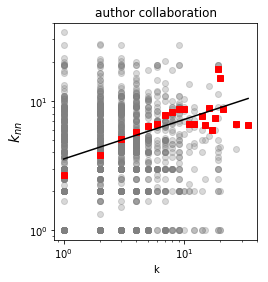

In [60]:
## Degree Correlation Function

def cal_correlation_function(g):
    annd = dict(nx.average_neighbor_degree(g))
    deg = dict(nx.degree(g))

    plt.loglog(list(deg.values()), list(annd.values()), 'o',c='gray', alpha=0.3)


    x = {}
    for i in deg:
        if deg[i] in x:
            x[deg[i]].append(annd[i])
        else:
            x[deg[i]] = [annd[i]]

    x = {i:np.mean(x[i]) for i in x}
    plt.loglog(x.keys(), x.values(), 'rs')
    # calculate the powerlaw index
    xk = np.log(np.array(list(x.keys())))
    yann = np.log(np.array(list(x.values())))
    A = np.vstack([xk, np.ones(len(xk))]).T
    m,c = np.linalg.lstsq(A,yann)[0]
    print(r'mu:',m)
    plt.plot(np.e**xk,np.e**(m*xk+c), 'k-',label=r'$\gamma=%s$'%(round(-m,2)))


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('author collaboration')
cal_correlation_function(g_coll)
plt.xlabel('k')
plt.ylabel(r'$k_{nn}$',fontsize=14)
plt.show()


### 匹配性系数 (degree correlation coefficient)

degree-degree correlation
$$\langle jk \rangle - \langle j \rangle \langle k \rangle=\sum_{jk}jk e_{jk} - \sum_j jq_j \sum_k kq_k=\sum_{jk}jk(e_{jk}-q_jq_k)$$

为了使得不同情况下可比，除以相关性最大值，即完美匹配的情况:$e_{jk}=q_k\delta_{jk}$，恰好为$q_k$的方差$\sigma^2= \sum_k k^2q^2_k -[\sum_k kq_k]^2$。

最终得到
$$r = \sum_{jk}\frac{jk(e_{jk} - q_jq_k)}{\sigma^2}$$

- $r<0$: Disassortative,大度节点和小度节点
- $r=0$: Neutral
- $r>0$: Assortative，大度节点和大度节点，


在networkx中可以用
```python
nx.assortativity.degree_assortativity_coefficient(g)
```
实现。

#### 科学家合作网络的匹配性系数

In [39]:
## newman's assortativity coefficient
print(nx.assortativity.degree_assortativity_coefficient(g_coll))

0.461622466753


#### BA网络的匹配性系数

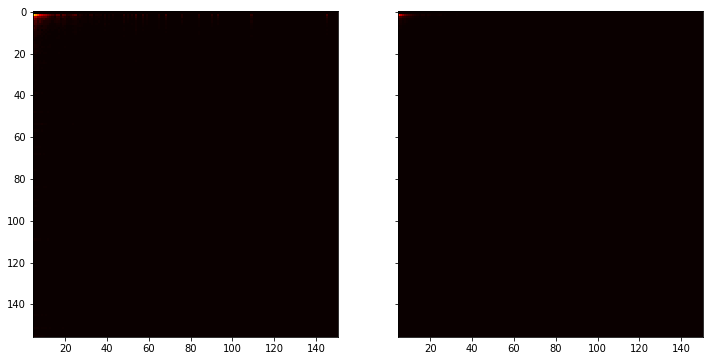

mu: -0.135358177714


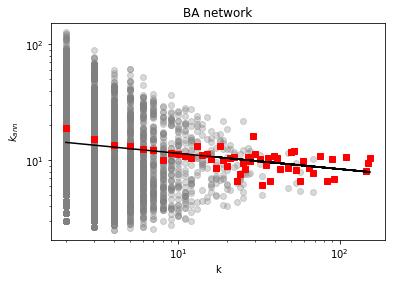

r: -0.0683554756529


In [61]:
g_ba = nx.barabasi_albert_graph(5000, 2)

## Degree Correlation Matrix
emat_ba,cmat_ba = cal_correlation_matrix(g_ba)

fig,(ax1,ax2)=plt.subplots(figsize=(12,6),nrows=1,ncols=2,sharey=True)

ax1.imshow(emat_ba, cmap = 'hot')


ax2.imshow(cmat_ba, cmap = 'hot')
plt.show()
## Degree Correlation Function
plt.title('BA network')
cal_correlation_function(g_ba)
plt.xlabel('k')
plt.ylabel(r'$k_{ann}$')
plt.show()

## newman's assortativity coefficient
print('r:',nx.assortativity.degree_assortativity_coefficient(g_ba))